In [1]:
import pandas as pd 
import numpy as np
#import lime 
#import lime.lime_tabular

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename='123.xlsx'

In [3]:
df=pd.read_excel(filename)# Read in data into a dataframe e

In [4]:
df.info() # See data types and non-missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   program_id                   5047 non-null   int64  
 1   program_city_group           3688 non-null   float64
 2   age_group                    5047 non-null   object 
 3   gender_group                 2530 non-null   float64
 4   service_type_id              5047 non-null   int64  
 5   distance_min                 2834 non-null   float64
 6   cpr_max                      3827 non-null   float64
 7   cpr_mean                     3827 non-null   float64
 8   cpr_median                   3827 non-null   float64
 9   cpr_std                      2609 non-null   float64
 10  cpr_min                      3827 non-null   float64
 11  cpr_region                   5047 non-null   float64
 12  number_of_clinics_in_progam  5047 non-null   int64  
 13  clinic_franchise  

In [5]:
# formating data
df['target']=pd.to_numeric(df['target'], errors='coerce')
df["age_group"].replace({"age_group_1": 0, "age_group_2": 1}, inplace=True)
df["program_city_group"].replace({1: 0, 2: 1}, inplace=True)
df["service_type_id"].replace({1: 0, 2: 1}, inplace=True)

In [6]:
# leaving columns with a percentage of nan below 45%
df = df.loc[:, df.isnull().mean() < .45]
df.shape[1]

33

In [7]:
df.head()

,program_id,program_city_group,age_group,service_type_id,distance_min,cpr_max,cpr_mean,cpr_median,cpr_min,cpr_region,...,anti_hcv_avg_min,doctor_visit_avg_max,doctor_visit_avg_mean,doctor_visit_avg_min,visit_genic_avg_max,visit_genic_avg_mean,visit_genic_avg_min,visit_neuro_avg_max,visit_neuro_avg_mean,visit_neuro_avg_min
0,1358,1.0,0,0,NaN,1.687585,1.687585,1.687585,1.687585,3.211632,...,5.250,9.525,6.622640,3.38889,1.800,1.800000,1.8,1.8,1.8000,1.8
1,1358,1.0,0,1,NaN,NaN,NaN,NaN,NaN,4.183154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1358,1.0,0,0,NaN,1.975258,1.355735,0.652630,0.481200,3.174975,...,5.250,9.525,6.622640,3.38889,1.800,1.800000,1.8,1.8,1.8000,1.8
3,1358,1.0,0,1,NaN,3.741448,3.485539,3.485539,3.229630,3.754277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,811,1.0,0,0,NaN,1.647994,1.861750,1.227380,0.732298,2.319465,...,1.225,6.000,4.472715,3.14375,7.325,5.377145,4.5,6.5,4.9115,4.0


In [8]:
# program_id
len(df['program_id'].unique())

1694

In [9]:
# the program_id column looks non informative
df=df.drop(columns='program_id')

In [10]:
df.shape

(5047, 32)

In [11]:
# deleting collinear columns
def big_corr_remove(data, limit):
    tmp = data['target']
    data = data.drop(columns = ['target'])
    
    corr_matrix = data.corr()
    col_len = len(corr_matrix.columns) - 1
    drop_cols = []

    # comparing correlations
    for i in range(col_len):
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            value = abs(item.values)            
            if value >= limit:
                drop_cols.append(col.values[0])
    # Delete correlated columns
    print(drop_cols)
    drops = set(drop_cols)
    
    data = data.drop(columns = drops)
    #print(data)
    
    data['target'] = tmp
    #print(data)
    return data

In [12]:
# deleting collinear columns
data=big_corr_remove(df, 0.6)

['cpr_median', 'cpr_min', 'cpr_region', 'cpr_region', 'analysis_urin_avg_max', 'analysis_urin_avg_max', 'analysis_blood_avg_max', 'analysis_blood_avg_max', 'analysis_blood_avg_max', 'analysis_blood_avg_max', 'analysis_blood_avg_max', 'analysis_blood_avg_mean', 'analysis_blood_avg_min', 'analysis_copro_avg_max', 'analysis_copro_avg_max', 'analysis_copro_avg_max', 'analysis_copro_avg_max', 'analysis_copro_avg_max', 'analysis_copro_avg_max', 'analysis_copro_avg_mean', 'analysis_copro_avg_mean', 'analysis_copro_avg_mean', 'anti_hcv_avg_max', 'doctor_visit_avg_max', 'doctor_visit_avg_max', 'doctor_visit_avg_max', 'doctor_visit_avg_max', 'doctor_visit_avg_max', 'doctor_visit_avg_max', 'doctor_visit_avg_max', 'doctor_visit_avg_max', 'doctor_visit_avg_max', 'doctor_visit_avg_mean', 'doctor_visit_avg_mean', 'doctor_visit_avg_mean', 'doctor_visit_avg_mean', 'visit_genic_avg_max', 'visit_genic_avg_max', 'visit_genic_avg_max', 'visit_genic_avg_max', 'visit_genic_avg_max', 'visit_genic_avg_max', 'v

In [13]:
df.shape

(5047, 32)

### Removing Outliers

In [14]:
data.describe()

,program_city_group,age_group,service_type_id,distance_min,cpr_max,cpr_mean,number_of_clinics_in_progam,analysis_urin_avg_mean,analysis_urin_avg_min,analysis_copro_avg_min,anti_hcv_avg_mean,anti_hcv_avg_min,doctor_visit_avg_min,visit_genic_avg_mean,target
count,3688.000000,5047.000000,5047.000000,2.834000e+03,3827.000000,3827.000000,5047.000000,2976.000000,2976.000000,2893.000000,2842.000000,2842.000000,2964.000000,2792.000000,5028.000000
mean,0.893167,0.194373,0.397662,3.497242e+05,3.502608,2.412985,22.492966,2.130211,1.020575,1.449900,3.677720,2.232222,4.037130,6.612106,30.377160
std,0.308943,0.395756,0.489463,7.388894e+05,2.752207,1.431383,31.215219,1.016429,0.528623,0.528029,1.526510,1.786696,1.411238,3.130706,59.812469
min,0.000000,0.000000,0.000000,4.121000e+00,0.431700,0.431700,1.000000,0.372500,0.145000,0.160000,1.000000,0.240000,0.663335,1.161665,0.113452
25%,1.000000,0.000000,0.000000,8.716210e+02,1.443169,1.178488,4.000000,1.375412,0.625000,1.200000,2.619110,1.250000,3.143750,4.619000,5.463719
50%,1.000000,0.000000,0.000000,2.890657e+04,2.872116,2.421375,9.000000,1.783750,0.945000,1.450000,3.421650,1.445000,4.137500,6.497150,14.650473
75%,1.000000,0.000000,1.000000,4.158773e+05,5.324715,3.399456,28.000000,2.620000,1.200000,1.750000,4.671215,2.120000,4.535715,8.700000,32.451632
max,1.000000,1.000000,1.000000,6.798234e+06,18.958365,8.529115,215.000000,11.437500,4.000000,11.000000,25.750000,25.750000,29.700000,19.850000,1289.632575


In [15]:
data.shape

(5047, 15)

In [16]:
first_quartile = data['target'].describe()['25%']
third_quartile = data['target'].describe()['75%']

# Remove outliers
data = data[(data['target'] > (first_quartile - 3 * (third_quartile - first_quartile))) & (data['target'] < (third_quartile + 3 * (third_quartile - first_quartile)))]
data.shape

(4773, 15)

In [17]:
data.to_csv('cleared_data.csv') 

In [18]:
# Split (70% - training set, 30% - testing set)
X, X_test, y, y_test = train_test_split(data.drop(columns='target'), pd.DataFrame(data['target']), test_size = 0.3, random_state = 42)

In [24]:
X.to_numpy()

array([[1.      , 0.      , 1.      , ...,      nan,      nan,      nan],
       [     nan, 1.      , 1.      , ...,      nan,      nan,      nan],
       [1.      , 0.      , 1.      , ...,      nan,      nan,      nan],
       ...,
       [1.      , 0.      , 0.      , ..., 5.935   , 3.464285,      nan],
       [1.      , 0.      , 0.      , ..., 1.4     , 1.33335 , 4.375   ],
       [1.      , 0.      , 1.      , ...,      nan,      nan,      nan]])

In [19]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is %0.4f' % baseline_guess)
print("MAE baseline performance is %0.4f" % mae(y_test, baseline_guess))

The baseline guess is 13.7622
MAE baseline performance is 14.2816


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### Imputing Missing Values

In [22]:
# Create an imputer object with a KNN strategy
imputer = KNNImputer(n_neighbors=2, weights="uniform")
# Train and transform the data
imputer.fit(X)
X = imputer.transform(X)
X_test =imputer.transform(X_test)

### Normalization

In [23]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Train and transorm the data
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [24]:
y=y['target'].tolist()
y_test=y_test['target'].tolist()

In [26]:
X

array([[1.        , 0.        , 1.        , ..., 0.22324579, 0.11457054,
        0.19662453],
       [0.        , 1.        , 1.        , ..., 0.03175225, 0.08872981,
        0.22646988],
       [1.        , 0.        , 1.        , ..., 0.04400235, 0.05172095,
        0.08632845],
       ...,
       [1.        , 0.        , 0.        , ..., 0.22324579, 0.07512114,
        0.23949886],
       [1.        , 0.        , 0.        , ..., 0.04547236, 0.        ,
        0.17194335],
       [1.        , 0.        , 1.        , ..., 0.09741278, 0.2882903 ,
        0.56523682]])

In [22]:
# Mean Absolute Error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Train and predict 
def fit_and_evaluate(models):
    model_mae=[]
    for model in models:
        # Train the model
        model.fit(X, y)

        # Make predictions and predict
        model_pred = model.predict(X_test)
        model_mae.append(mae(y_test, model_pred))

    # Performance metrics
    return model_mae

In [23]:
lr = LinearRegression()
svm = SVR(C = 100, gamma = 0.1)
random_forest = RandomForestRegressor(random_state=60)
gradient_boosted = GradientBoostingRegressor(random_state=60)
lr_mae, svm_mae, random_forest_mae, gradient_boosted_mae = fit_and_evaluate([lr, svm, random_forest, gradient_boosted])

In [24]:
print(f'''Performances on the test set (MAE):
Linear Regression  {round(lr_mae, 4)} 
Support Vector Machine Regression  {round(svm_mae, 4)} 
Random Forest Regression  {round(random_forest_mae, 4)}  
Gradient Boosted Regression  {round(gradient_boosted_mae, 4)}''')

Performances on the test set (MAE):
Linear Regression  14.1699 
Support Vector Machine Regression  12.8293 
Random Forest Regression  14.2415  
Gradient Boosted Regression  13.5205


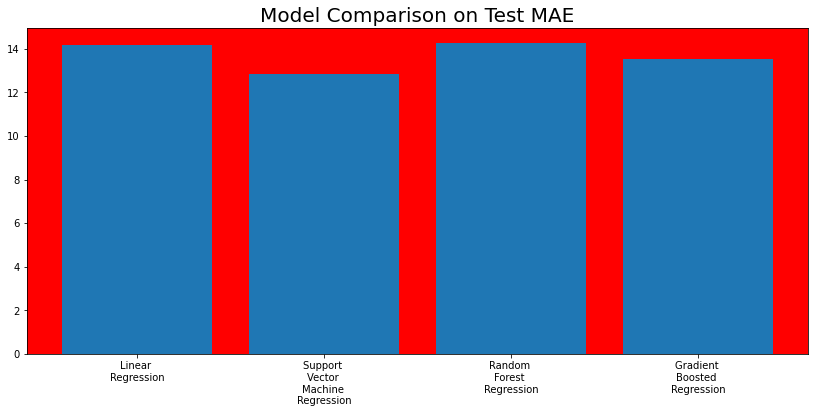

In [25]:
fig, ax = plt.subplots()
y=[lr_mae, svm_mae, random_forest_mae, gradient_boosted_mae]
x=['Linear \nRegression', 'Support \nVector \nMachine \nRegression', 'Random \nForest \nRegression', 'Gradient \nBoosted \nRegression']
ax.bar(x, y)
ax.set_facecolor('red')
fig.set_figwidth(14)
fig.set_figheight(6)
plt.title('Model Comparison on Test MAE', size = 20);
plt.show()

### To describe the model, we use Lime (Local Interpretable Model-Agnostic Explanations). 

In [26]:
model_pred = svm.predict(X_test)

# Find the residuals
residuals = abs(model_pred - y_test)
    
# Exact the worst and best prediction
wrong = X_test[np.argmax(residuals), :]
right = X_test[np.argmin(residuals), :]

In [27]:
# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X, 
                                                   mode = 'regression',
                                                   training_labels = y,
                                                   feature_names = data.columns.tolist())

Prediction: 8.7918
Actual Value: 99.5146


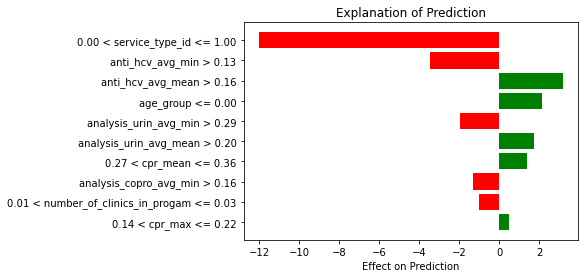

In [28]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % svm.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, predict_fn = svm.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction');
plt.xlabel('Effect on Prediction');

Prediction: 13.4001
Actual Value: 13.3973


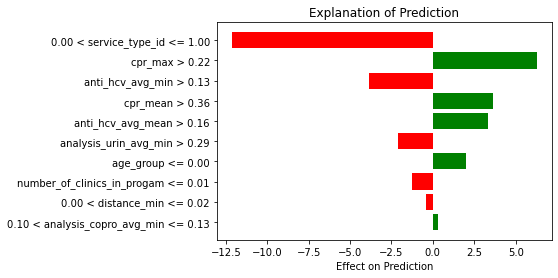

In [29]:
# Display the predicted and true value for the right instance
print('Prediction: %0.4f' % svm.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, svm.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction');
plt.xlabel('Effect on Prediction');

The plot from LIME is showing the contribution to the final prediction from each of the features.